# Predict the Price of Bitcoin - Time Series Analysis Project
Weekly challenge: Week 09  
Date: 9/19/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data file and review the data

In [2]:
df = pd.read_csv(r'C:\Users\unpat\_Projects\Challenge_AProjectAWeek\Week_09/bitcoin_price_Training - Training.csv')

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


## Prepare the data for analysis

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [8]:
df = df.sort_index()

In [9]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [10]:
# For time series analysis, date must be row index
# Setting the Date as index
df.set_index('Date', inplace = True)

In [11]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


## Exploratory Data Analysis

In [12]:
# Creating a copy of the data
data = df.copy()

In [13]:
data.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


We want to predict the closing price so we will analyze the 'Close' variable

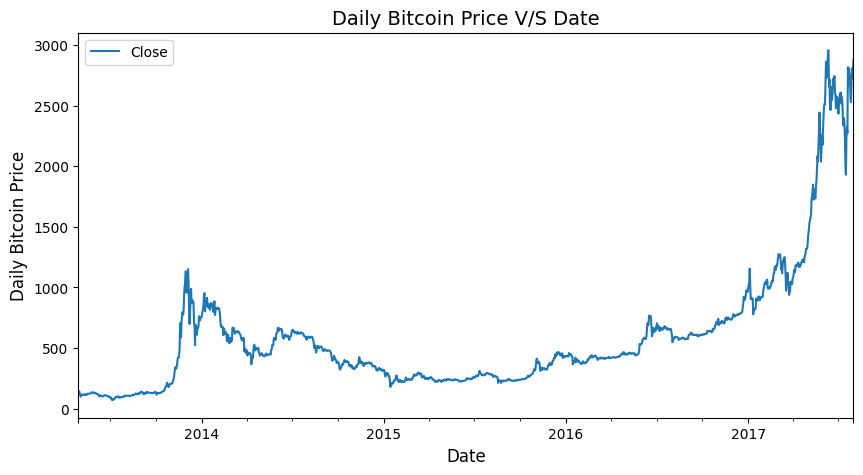

In [14]:
plt.figure(figsize=(10,5))
data['Close'].plot()

plt.ylabel('Daily Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

* We can see that around the end of 2013 and beginning of 2014, there are huge spikes in the price.  
* Price also has spiked around middle of 2017.

In [15]:
# Store the closing price in a new series data2
data2 = data['Close']

In [16]:
data2.head(3)

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
Name: Close, dtype: float64

## Resampling the data

In [17]:
# Resampling the 'Close' variable data on 'week'
data2.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

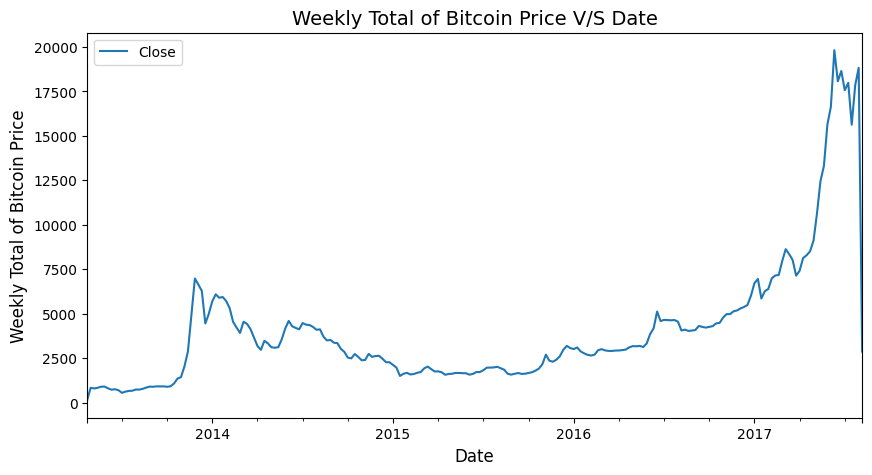

In [18]:
# Weekly
plt.figure(figsize=(10,5))
data2.resample('W').sum().plot()

plt.ylabel('Weekly Total of Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Weekly Total of Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

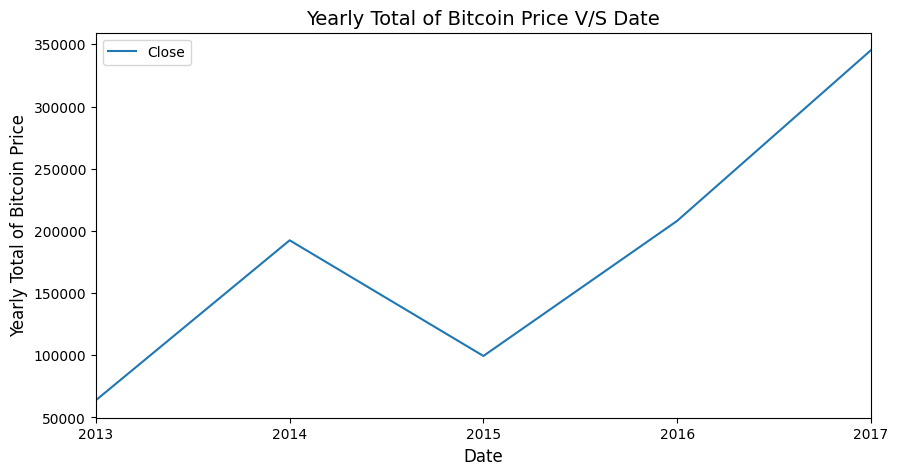

In [19]:
# Yearly
plt.figure(figsize=(10,5))
data2.resample('Y').sum().plot()

plt.ylabel('Yearly Total of Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Yearly Total of Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

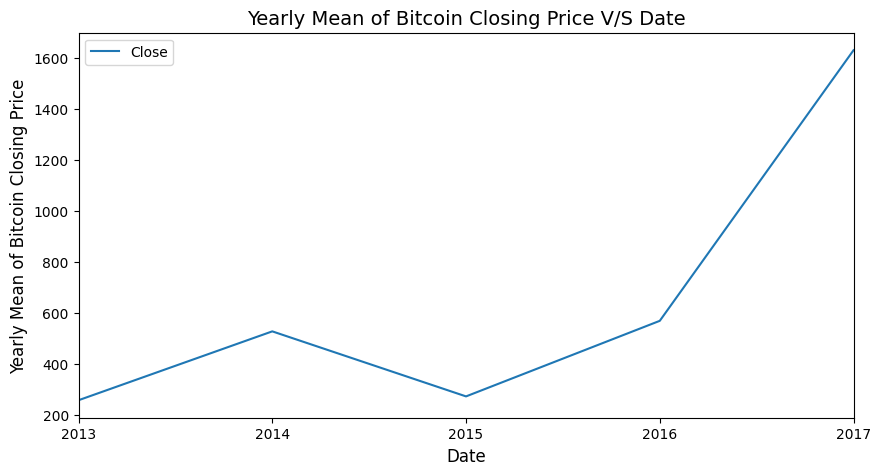

In [20]:
# mean closing - Yearly
plt.figure(figsize=(10,5))
data2.resample('Y').mean().plot()

plt.ylabel('Yearly Mean of Bitcoin Closing Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Yearly Mean of Bitcoin Closing Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

## In-depth analysis of the data

### Analyze average closing price of day of week

In [21]:
# Getting the day of week
data2.index.dayofweek

Int64Index([0, 6, 5, 4, 3, 2, 1, 0, 6, 5,
            ...
            1, 0, 6, 5, 4, 3, 2, 1, 0, 6],
           dtype='int64', name='Date', length=1556)

In [22]:
# Grouping data per day of week; averaging 'Close' for each day of week
weekday = data.groupby(data2.index.dayofweek)['Close'].mean()
weekday

Date
0    588.738655
1    582.402658
2    581.731216
3    585.565135
4    583.876622
5    584.545180
6    582.802511
Name: Close, dtype: float64

In [23]:
weekday.index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [24]:
weekday

Mon    588.738655
Tue    582.402658
Wed    581.731216
Thu    585.565135
Fri    583.876622
Sat    584.545180
Sun    582.802511
Name: Close, dtype: float64

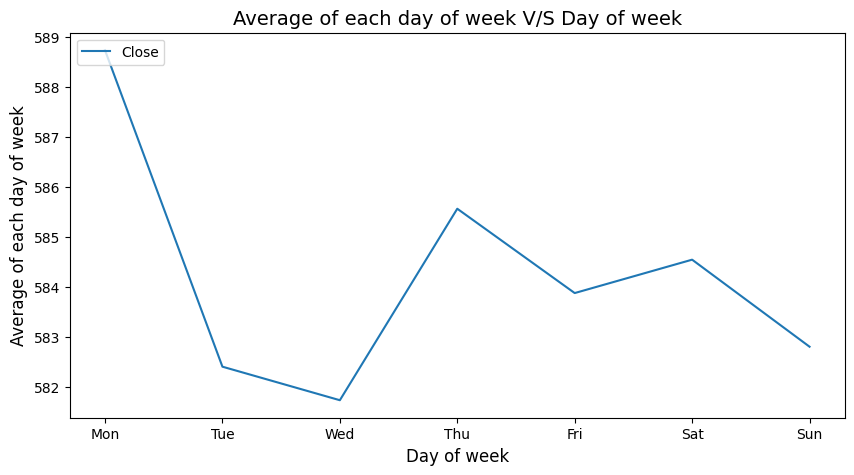

In [25]:
#plt.figure(figsize=(10,5))
weekday.plot(figsize=(10,5))

plt.ylabel('Average of each day of week', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title('Average of each day of week V/S Day of week', fontsize=14)
plt.legend(loc = 2)
plt.show()

### Analyze average closing price of day of year

In [26]:
# Getting the day of week
days = data2.index.dayofyear
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
            127, 126, 125, 124, 123, 122, 121, 120, 119, 118],
           dtype='int64', name='Date', length=1556)

In [27]:
# Grouping data per the day of year; averaging 'Close' for each day of year
dayofyearavg = data.groupby(days)['Close'].mean()
dayofyearavg

Date
1      629.5775
2      643.1525
3      643.4125
4      677.8800
5      663.3350
         ...   
362    600.1375
363    616.6550
364    616.7475
365    616.5025
366    963.7400
Name: Close, Length: 366, dtype: float64

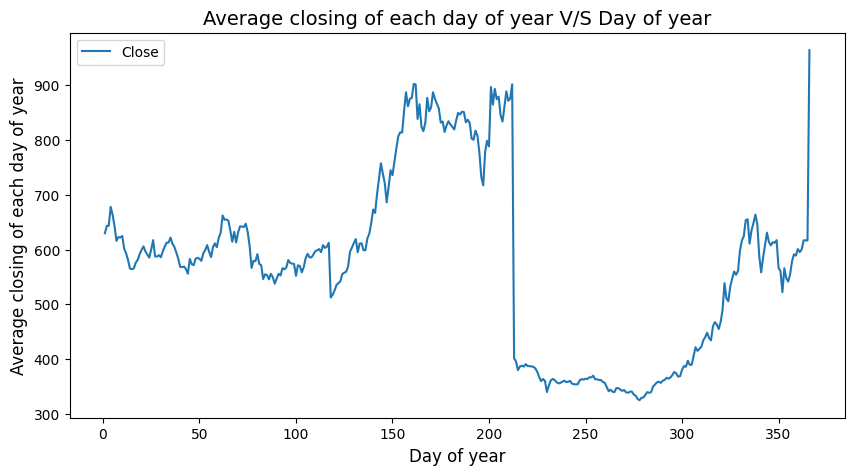

In [28]:
#plt.figure(figsize=(10,5))
dayofyearavg.plot(figsize=(10,5))

plt.ylabel('Average closing of each day of year', fontsize=12)
plt.xlabel('Day of year', fontsize=12)
plt.title('Average closing of each day of year V/S Day of year', fontsize=14)
plt.legend(loc = 2)
plt.show()

### Analyze average closing price of quarter of year

In [29]:
# Getting the quarter of year
quarters = data2.index.quarter
quarters

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='Date', length=1556)

In [30]:
# Grouping data per quarter of year; averaging 'Close' for each quatret of year
quarterofyearavg = data.groupby(quarters)['Close']
quarterofyearavg

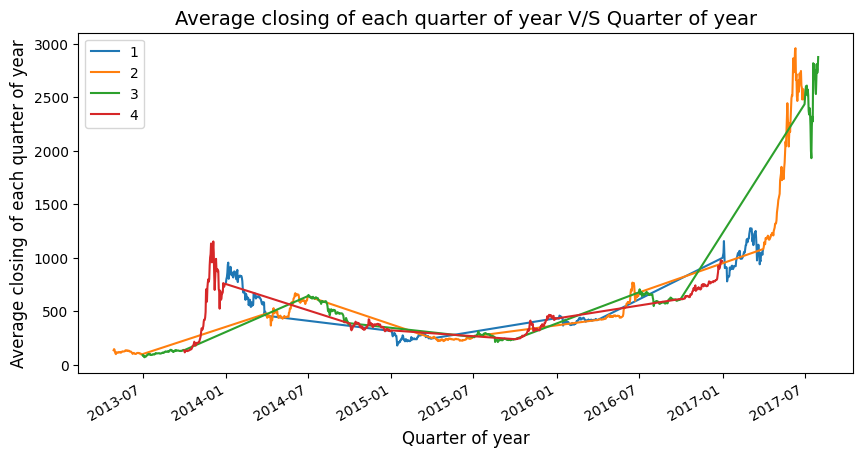

In [31]:
#plt.figure(figsize=(10,5))
quarterofyearavg.plot(figsize=(10,5))

plt.ylabel('Average closing of each quarter of year', fontsize=12)
plt.xlabel('Quarter of year', fontsize=12)
plt.title('Average closing of each quarter of year V/S Quarter of year', fontsize=14)
plt.legend(loc = 2)
plt.show()

## Analyze the trend of closing price in the weekdays and weekends

In [32]:
data['dayofweek'] = data.index.dayofweek

In [33]:
data.head(3)

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",0
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",6
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",5


In [34]:
# Function to separate weekdays and weekends
def assign_labels(dayofweek_):
    if dayofweek_ < 5:
        return 'weekdays'
    else:
        return 'weekends'

In [35]:
data['dayofweek'] = data['dayofweek'].apply(assign_labels)
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek
Date,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays


<AxesSubplot: title={'center': 'Weekdays'}, xlabel='Date'>

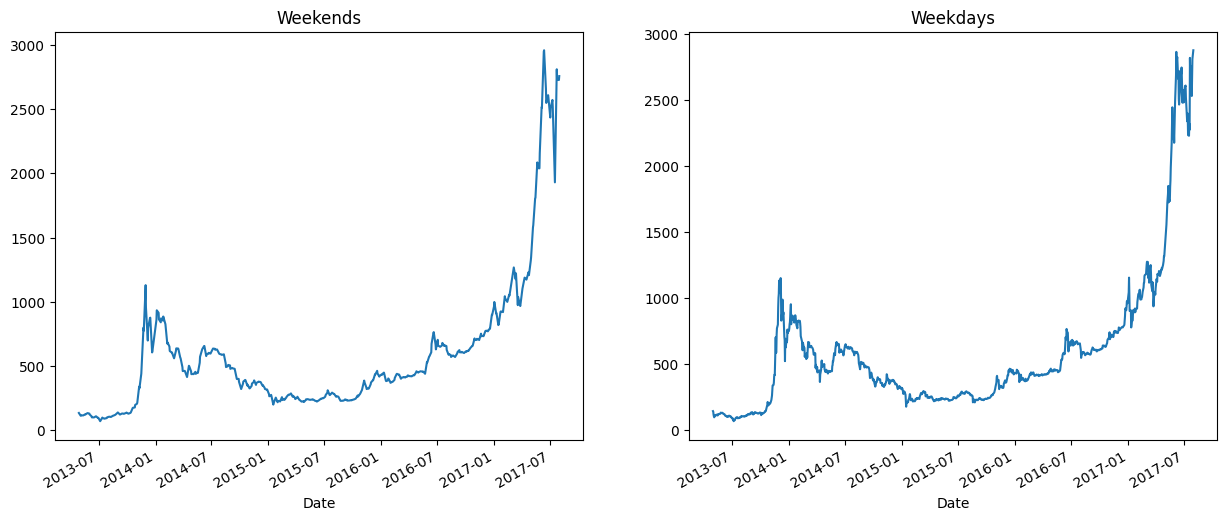

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

data[data['dayofweek'] == 'weekends']['Close'].plot(ax = ax[0], title = 'Weekends')
data[data['dayofweek'] == 'weekdays']['Close'].plot(ax = ax[1], title = 'Weekdays')

## Build a baseline model
### Predictions using a Naive (baseline) model
* Previosu value is the best reflector of my next value  
* Use Pandas in-built function shift() to build this model  

In [37]:
data['prediction_naive'] = data['Close'].shift(1)

In [38]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive
Date,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01


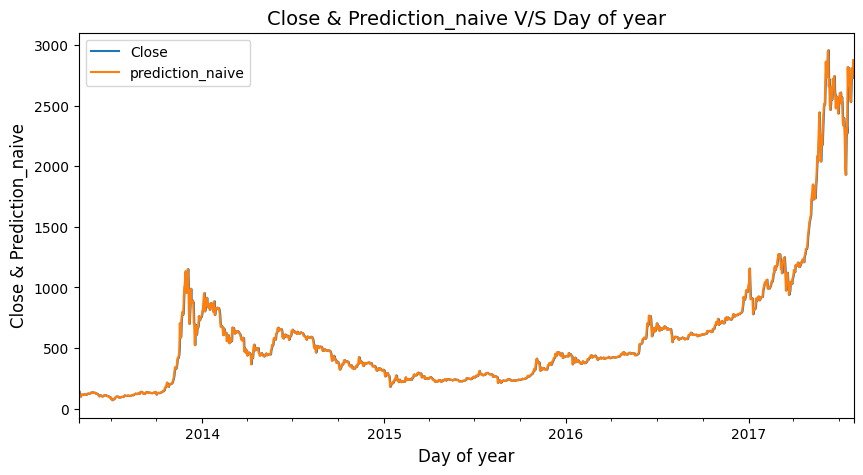

In [39]:
data[['Close','prediction_naive']].plot(figsize = (10,5))

plt.ylabel('Close & Prediction_naive', fontsize=12)
plt.xlabel('Day of year', fontsize=12)
plt.title('Close & Prediction_naive V/S Day of year', fontsize=14)
plt.legend(loc = 2)
plt.show()

### Evaluate the model performance

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
np.sqrt(mean_squared_error(data['Close'][1:], data['prediction_naive'][1:]))
# discard the 1st row with NaN

37.23363264835875

* This means that the average difference of prediction and actual value if 37.23  
* In real life data, previosu value is not the best reflector of the next value and so Naive model is not a reliable model.

## Seasonality & Stationarity
### Examine if we have seasonality or noise in our data

<AxesSubplot: xlabel='Date'>

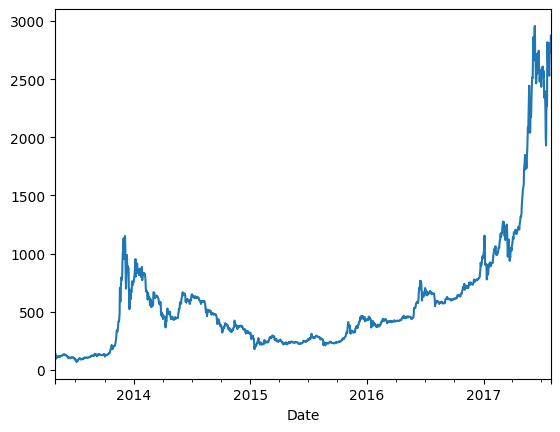

In [42]:
# Review of 'Close' variable before moving forward
data['Close'].plot()

In [43]:
mean_ = data['Close'].rolling(window = 7).mean()
std_ = data['Close'].rolling(window = 7).std()

In [44]:
mean_.head(10)

Date
2017-07-31            NaN
2017-07-30            NaN
2017-07-29            NaN
2017-07-28            NaN
2017-07-27            NaN
2017-07-26            NaN
2017-07-25    2706.527143
2017-07-24    2689.315714
2017-07-23    2685.490000
2017-07-22    2697.442857
Name: Close, dtype: float64

In [45]:
std_.head(10)

Date
2017-07-31           NaN
2017-07-30           NaN
2017-07-29           NaN
2017-07-28           NaN
2017-07-27           NaN
2017-07-26           NaN
2017-07-25    123.449778
2017-07-24    102.635064
2017-07-23    100.152919
2017-07-22    110.331669
Name: Close, dtype: float64

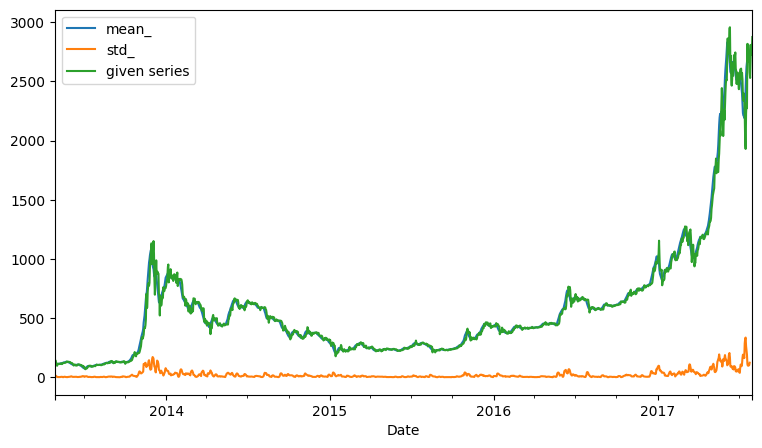

In [46]:
plt.figure(figsize = (9,5))

mean_.plot(label = 'mean_')
std_.plot(label = 'std_')
data['Close'].plot(label = 'given series')

plt.legend(loc = 2)
plt.show()

* It looks like our data follows seasonality and trend.
* We will use statistical tools to check if there exist any trend, seasonality or stationarity.
* We will use Augmented Dickey–Fuller test to check the above point
* Augmented Dickey–Fuller test mainly depends on p-value to decide of the data is stationary or not

## Perform statistical test to detect stationarity

### Augmented Dickey-Fuller (ADF) test (Ad Fuller test)
-- P-value  
-- Test statistic value  
-- # of lags considered  
-- Critical value cutoffs  

**Null Hypothesis H0:** The time series **`is not`** stationary  
**Alternate Hypothesis H1:** The time series **`is`** stationary  
    
* **p-value > 0.05:** Accept the null hypothesis (H0), the data has a unit root and is `non-stationary`
* **p-value <= 0.05:** Fail to accept the null hypothesis (H0), the data does not have a unit root and is `stationary`

**adfuller returns:**

* adf : float --- The test statistic.  
* pvalue : float --- MacKinnon"s approximate p-value based on MacKinnon (1994, 2010).  
* usedlag : int --- The number of lags used.  
* nobs : int --- The number of observations used for the ADF regression and calculation of the critical values.  
* critical values : dict --- Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010).  
* icbest : float --- The maximized information criterion if autolag is not None.  
* resstore : ResultStore, optional --- A dummy class with results attached as attributes.  

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
# Check to see if there are any missing values
data['Close'].isnull().sum()

0

There are not missing values in our 'Close' variable data.

In [49]:
# Augmented Dickey-Fuller test

result = adfuller(data['Close'],
         maxlag=None,
         regression='c',
         autolag='AIC',
#         store=True,
#         regresults=True,
)

print('* adf - The test statistic:', result[0])
print('* p-value - MacKinnon"s approximate p-value:', result[1])
print('* usedlag - The # of lags used:', result[2])
print('* nobs - The # of observations used for the ADF regression and calculation of the critical values:', result[3])
print('* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: \n')
for key, value in result[4].items():
    print('  Critical value:', end = "")
    print(f' {key}, {value}')
print('\n* icbest - The maximized information criterion if autolag is not None:', result[5])

* adf - The test statistic: -4.477989431941969
* p-value - MacKinnon"s approximate p-value: 0.0002154535155876224
* usedlag - The # of lags used: 24
* nobs - The # of observations used for the ADF regression and calculation of the critical values: 1531
* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: 

  Critical value: 1%, -3.4346284441307184
  Critical value: 5%, -2.863429668579316
  Critical value: 10%, -2.5677760318409732

* icbest - The maximized information criterion if autolag is not None: 14821.38478692329


* Our p-value is 0.0002 which is < .05  
* So we failed to accept the null hypothesis (H0)  
* The data does not have a unit root and is `stationary`

Automating the above calculations

In [50]:
def test_for_stationarity(feature):
    mean_ = data[feature].rolling(window = 7).mean()
    std_ = data[feature].rolling(window = 7).std()
    
    plt.figure(figsize = (15,6))

    mean_.plot(label = 'mean_')
    std_.plot(label = 'std_')
    data[feature].plot(label = 'given series')

    plt.legend(loc = 2)
    plt.show()
    
    # Augmented Dickey-Fuller test
    result = adfuller(data[feature].dropna(),
                     maxlag=None,
                     regression='c',
                     autolag='AIC',
        #         store=True,
        #         regresults=True,
    )

    print('* adf - The test statistic:', result[0])
    print('* p-value - MacKinnon"s approximate p-value:', result[1])
    print('* usedlag - The # of lags used:', result[2])
    print('* nobs - The # of observations used for the ADF regression and calculation of the critical values:', result[3])
    print('* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: \n')
    for key, value in result[4].items():
        print('  Critical value:', end = "")
        print(f' {key}, {value}')
    print('\n* icbest - The maximized information criterion if autolag is not None:', result[5])
    
    if result[1] <= 0.05:
        print('* We have a strong evidance against the null hypothesis so reject it; the data is stationary.')
    else:
        print('* We have a weak evidance against the null hypothesis so accept it; the data is non-stationary.')


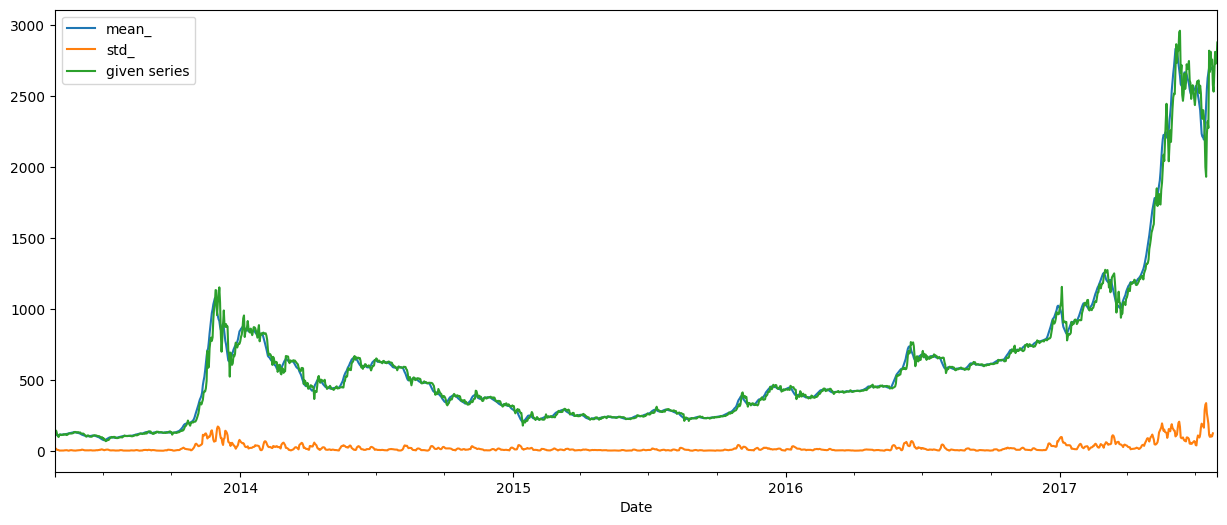

* adf - The test statistic: -4.477989431941969
* p-value - MacKinnon"s approximate p-value: 0.0002154535155876224
* usedlag - The # of lags used: 24
* nobs - The # of observations used for the ADF regression and calculation of the critical values: 1531
* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: 

  Critical value: 1%, -3.4346284441307184
  Critical value: 5%, -2.863429668579316
  Critical value: 10%, -2.5677760318409732

* icbest - The maximized information criterion if autolag is not None: 14821.38478692329
* We have a strong evidance against the null hypothesis so reject it; the data is stationary.


In [51]:
test_for_stationarity('Close')

## How to smooth a series
* Eliminate trend from the data  
* Remove seasonality factor

### Eliminate trend from the data
* We can eliminate trend by applying log transformation on our data.  
* Explanation on how log transformation eliminates trend:  
  -- log(1) = 0  
  -- log(10) = 1  
  -- log(100) = 2  
  -- log(1000) = 3  
  -- This is how each higher value data is transformed into much lower value data.  
* Many machine learning algorithm work well with normally distributed data. So we have to transform skewed datasets into normally distributed dataset before we can use it for a ML algorithm.  
* If a dataset has outliers that are very high in value, the dataset is skewed. In this case, the log transformation would transform the dataset much like a normally distributed dataset.

**Data of 'Close' variable `before` the log transformation**

In [52]:
data['Close'].describe()

count    1556.000000
mean      584.239396
std       525.904442
min        68.430000
25%       254.320000
50%       438.855000
75%       663.402500
max      2958.110000
Name: Close, dtype: float64

This is what we have.  
* min: 68.43  
* max: 2958.11  
* mean: 584.23  
Our dataset is heavily right skewed. Now we will apply log transformation below.

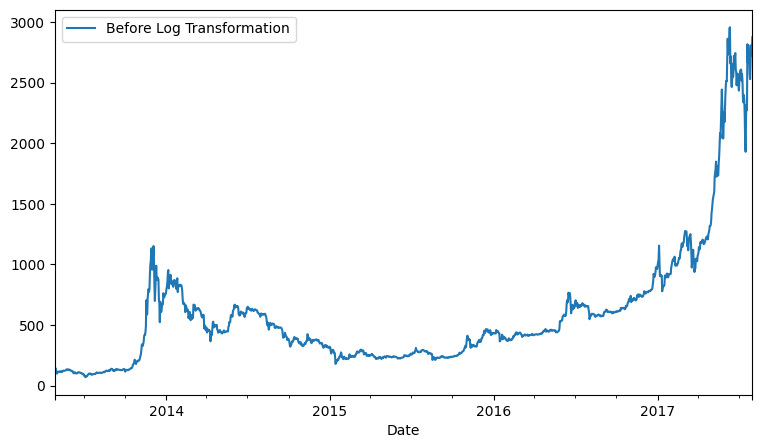

In [53]:
# Plot of 'Close' before the Log Transformation
plt.figure(figsize = (9,5))

data['Close'].plot(label = 'Before Log Transformation')

plt.legend(loc = 2)
plt.show()

**Data of 'Close' variable `after` the log transformation**

In [54]:
np.log(data['Close']).describe()

count    1556.000000
mean        6.077814
std         0.754269
min         4.225811
25%         5.538593
50%         6.084169
75%         6.497382
max         7.992306
Name: Close, dtype: float64

After the log transformation, we got the following statistical values.  
* min: 4.22  
* max: 7.99  
* mean: 6.07  

Some skewness has been removed and we now have improved statistical numbers.

In [55]:
# Storing the log data
log_data = np.log(data['Close'])

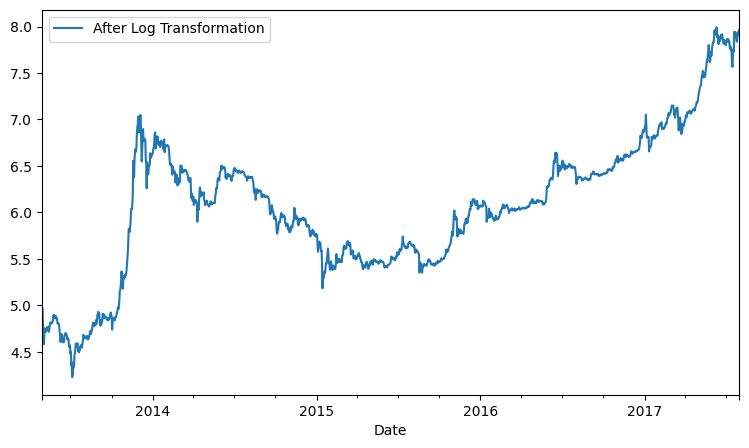

In [56]:
# Plot of 'Close' after the Log Transformation
plt.figure(figsize = (9,5))

log_data.plot(label = 'After Log Transformation')

plt.legend(loc = 2)
plt.show()

### Remove seasonality factor

In [57]:
# Computing rolling average for a rolling window of 7 days
rolling_diff = log_data - log_data.shift(7)

In [58]:
Rolling_average = log_data.rolling(window = 7).mean()

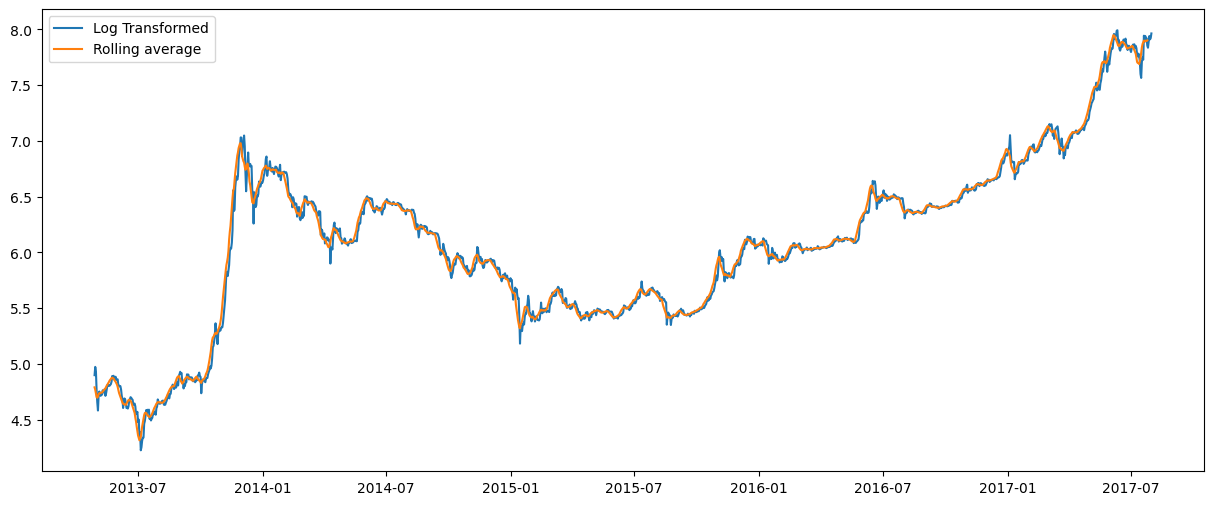

In [59]:
# Plot of Log Transformation and Rolling average
plt.figure(figsize = (15,6))

plt.plot(log_data, label = 'Log Transformed')
plt.plot(Rolling_average, label = 'Rolling average')

plt.legend(loc = 2)
plt.show()

In [60]:
# Diff. of Log Transformation and Rolling average

In [61]:
lr_diff = log_data - Rolling_average
lr_diff

Date
2017-07-31         NaN
2017-07-30         NaN
2017-07-29         NaN
2017-07-28         NaN
2017-07-27         NaN
                ...   
2013-05-02   -0.041435
2013-05-01    0.060456
2013-04-30    0.201349
2013-04-29    0.204377
2013-04-28    0.109284
Name: Close, Length: 1556, dtype: float64

In [62]:
# Storing lr_diff in our dataframe
data['lr_diff'] = lr_diff

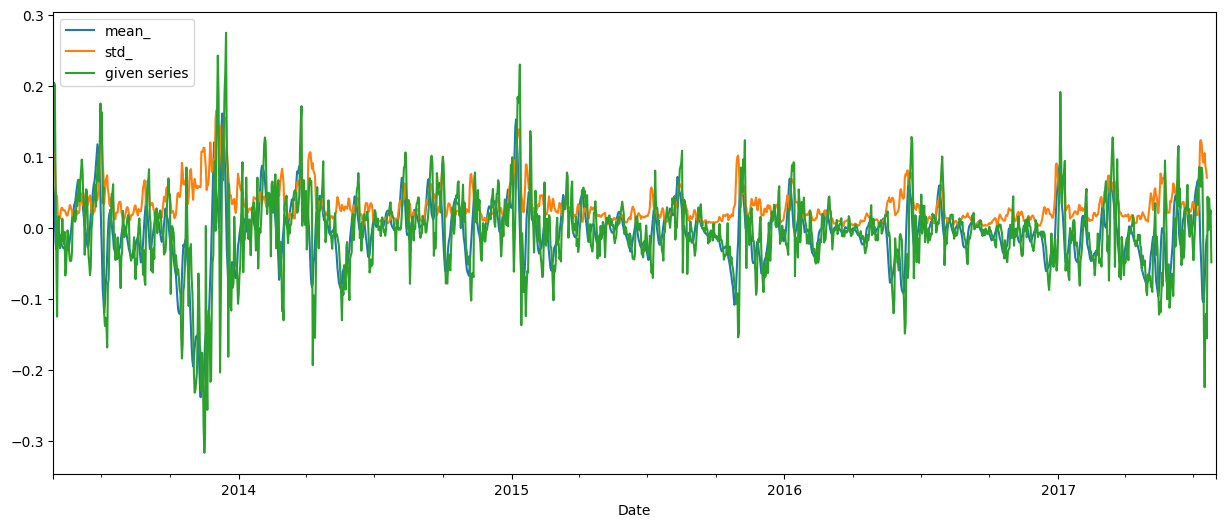

* adf - The test statistic: -7.188887202324554
* p-value - MacKinnon"s approximate p-value: 2.5340955586100355e-10
* usedlag - The # of lags used: 22
* nobs - The # of observations used for the ADF regression and calculation of the critical values: 1527
* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: 

  Critical value: 1%, -3.434639670505874
  Critical value: 5%, -2.8634346233980663
  Critical value: 10%, -2.567778670304311

* icbest - The maximized information criterion if autolag is not None: -5822.98190984885
* We have a strong evidance against the null hypothesis so reject it; the data is stationary.


In [63]:
# Check if the 'lr_diff' values follow a stationaty trend or not
test_for_stationarity('lr_diff')

In [64]:
# Applying differencing
log_ts = log_data - log_data.shift(7)

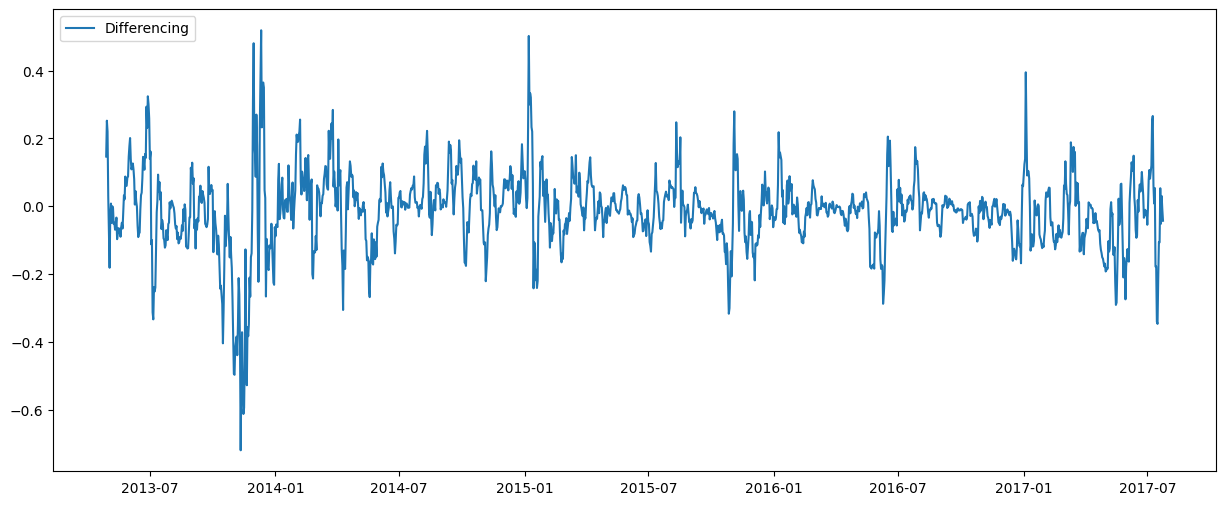

In [65]:
# Plot of differencing
plt.figure(figsize = (15,6))

plt.plot(log_ts, label = 'Differencing')

plt.legend(loc = 2)
plt.show()

In [66]:
# Storing lr_diff in our dataframe
data['log_ts'] = log_ts

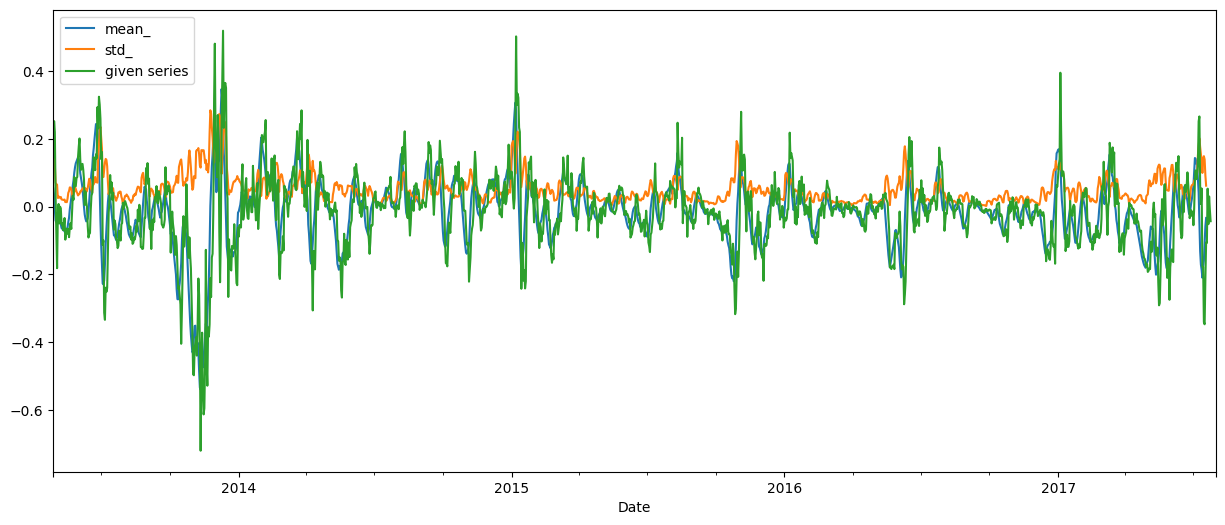

* adf - The test statistic: -6.511722596316723
* p-value - MacKinnon"s approximate p-value: 1.0961860829579915e-08
* usedlag - The # of lags used: 23
* nobs - The # of observations used for the ADF regression and calculation of the critical values: 1525
* critical values - Critical values for the test statistic at the 1%, 5%, and 10% levels. Based on MacKinnon: 

  Critical value: 1%, -3.4346453058155175
  Critical value: 5%, -2.8634371105641443
  Critical value: 10%, -2.5677799947325988

* icbest - The maximized information criterion if autolag is not None: -5031.91852528804
* We have a strong evidance against the null hypothesis so reject it; the data is stationary.


In [67]:
# Check if the 'log_ts' values follow a stationaty trend or not
test_for_stationarity('log_ts')

## Facebook Prophet

### Build model using Facebook Prophet
* Handles irregular intervals such as holidays  
* Handles noise / outliers in the data

In [68]:
from prophet import Prophet

In [69]:
model = Prophet()

In [70]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN,NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34,NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18,NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45,NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01,NaN,NaN


In [71]:
df = data[['Close']]

In [72]:
data.head()

,Open,High,Low,Close,Volume,Market Cap,dayofweek,prediction_naive,lr_diff,log_ts
Date,,,,,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",weekdays,NaN,NaN,NaN
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",weekends,2875.34,NaN,NaN
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",weekends,2757.18,NaN,NaN
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",weekdays,2726.45,NaN,NaN
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",weekdays,2809.01,NaN,NaN


* Per fbprophet documentation, date column has to be 'ds' and forecast feature to be 'y' (closing price)
* The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
* The y column must be numeric, and represents the measurement we wish to forecast.

In [73]:
# Index is 'Data' so we have to reset the index to make 'Data' as a column
df = df.reset_index()

In [74]:
# Changing name of the columns
df.columns = ['ds','y']

In [75]:
df.head()

,ds,y
0,2017-07-31,2875.34
1,2017-07-30,2757.18
2,2017-07-29,2726.45
3,2017-07-28,2809.01
4,2017-07-27,2671.78


In [76]:
# Fitting the model
m = model.fit(df)

17:27:50 - cmdstanpy - INFO - Chain [1] start processing
17:27:51 - cmdstanpy - INFO - Chain [1] done processing


In [77]:
# Making a dataframe for predictions
future = m.make_future_dataframe(periods = 500, freq = 'D')

In [78]:
future.head()

,ds
0,2013-04-28
1,2013-04-29
2,2013-04-30
3,2013-05-01
4,2013-05-02


In [79]:
future.shape

(2056, 1)

In [80]:
data.shape

(1556, 10)

In [81]:
# Making predictions on the future dataframe
forecast = m.predict(future)

In [82]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-04-28,78.847830,-214.816652,60.912673,78.847830,78.847830,-155.789564,-155.789564,-155.789564,-2.736744,-2.736744,-2.736744,-153.052820,-153.052820,-153.052820,0.0,0.0,0.0,-76.941734
1,2013-04-29,76.790070,-211.462434,75.219796,76.790070,76.790070,-145.270405,-145.270405,-145.270405,1.467635,1.467635,1.467635,-146.738040,-146.738040,-146.738040,0.0,0.0,0.0,-68.480335
2,2013-04-30,74.732310,-214.367140,71.648283,74.732310,74.732310,-137.963242,-137.963242,-137.963242,2.467468,2.467468,2.467468,-140.430710,-140.430710,-140.430710,0.0,0.0,0.0,-63.230933
3,2013-05-01,72.674550,-202.149403,76.667480,72.674550,72.674550,-134.045765,-134.045765,-134.045765,0.062324,0.062324,0.062324,-134.108089,-134.108089,-134.108089,0.0,0.0,0.0,-61.371215
4,2013-05-02,70.616789,-203.148588,87.200623,70.616789,70.616789,-125.561046,-125.561046,-125.561046,2.182491,2.182491,2.182491,-127.743537,-127.743537,-127.743537,0.0,0.0,0.0,-54.944257


In [83]:
# We need only a few columns from the forecast dataframe
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2046,2018-12-04,5592.883585,3049.392835,8015.824190
2047,2018-12-05,5592.415309,3047.360486,8097.236081
2048,2018-12-06,5595.886422,3056.842035,8028.562006
2049,2018-12-07,5593.346936,2981.330822,8068.879901
2050,2018-12-08,5592.715751,3030.463210,8109.052709
2051,2018-12-09,5592.298230,3024.427121,8108.332053
2052,2018-12-10,5596.325963,3010.579330,8065.339084
2053,2018-12-11,5596.987021,3008.616173,8061.781936
2054,2018-12-12,5594.168587,3021.350798,8071.381007
2055,2018-12-13,5595.885246,2968.893924,8134.660097


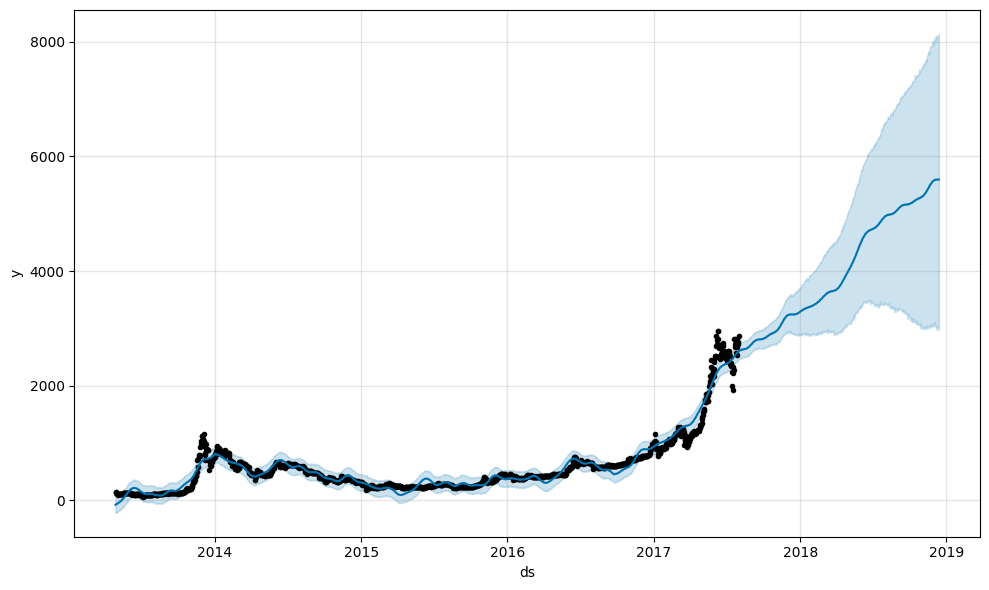

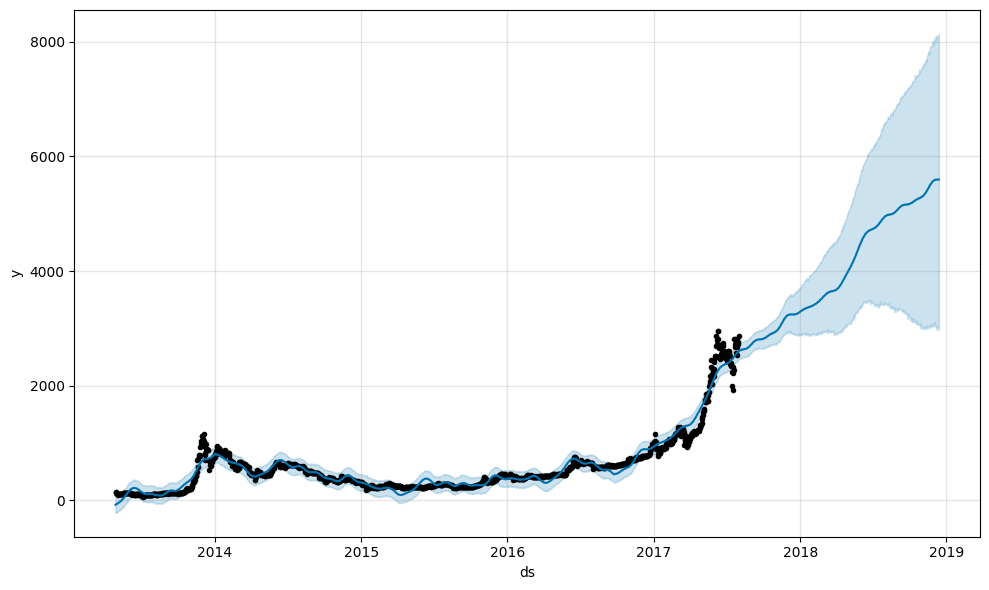

In [84]:
# Plot the forecast
model.plot(forecast)

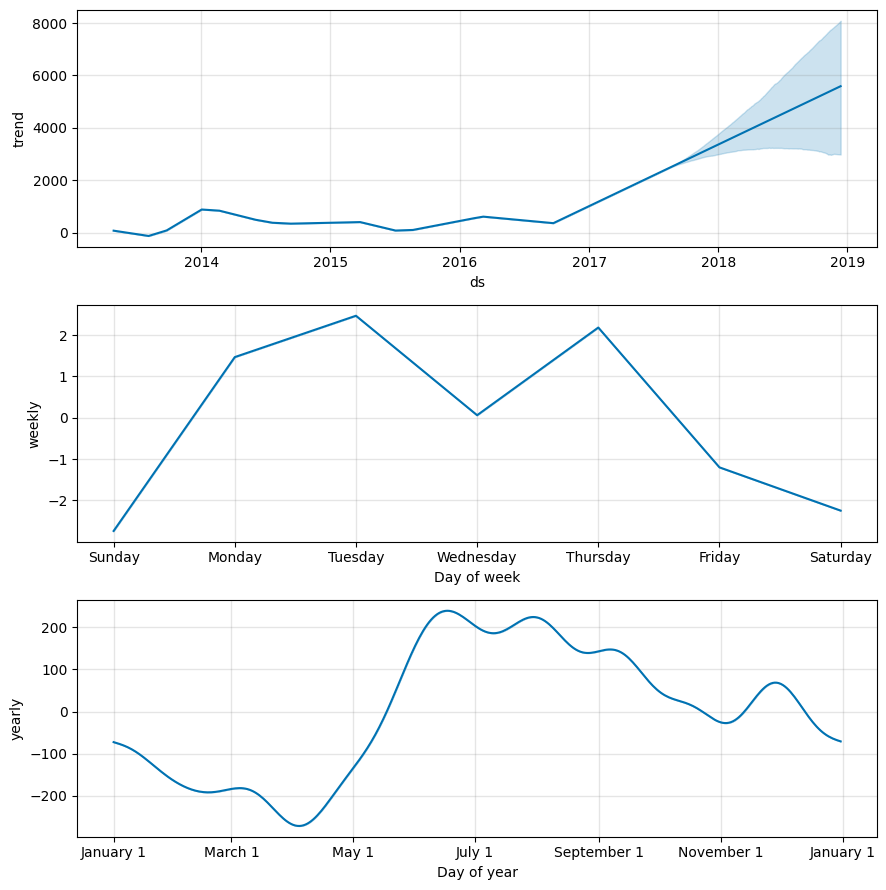

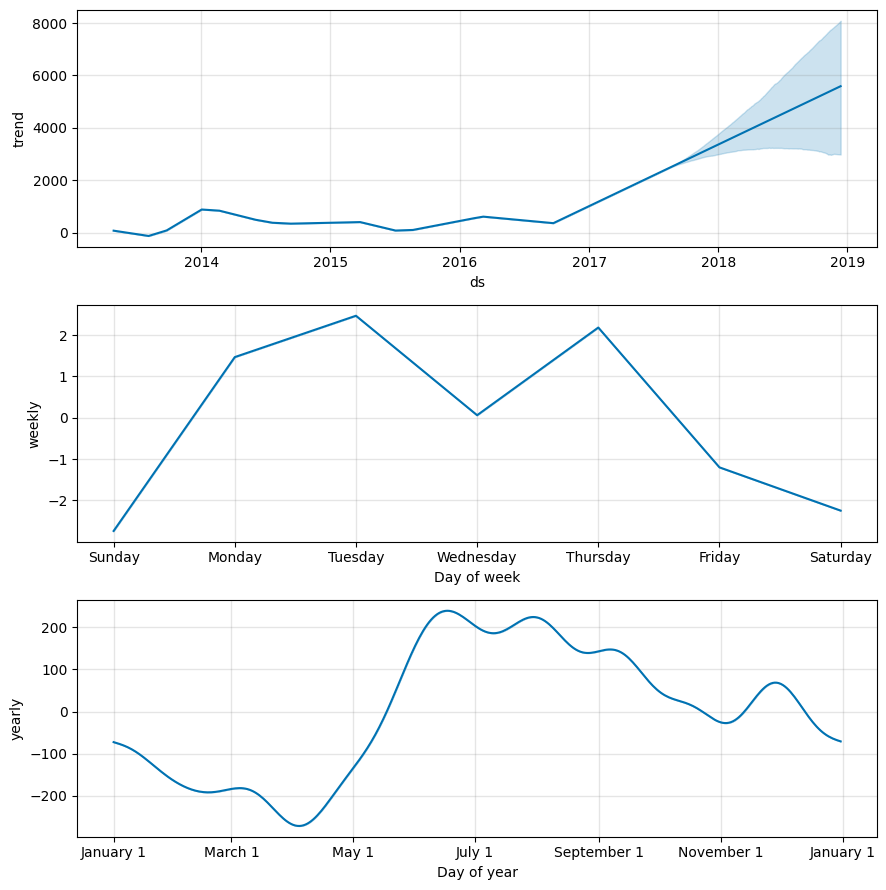

In [85]:
# Plot each component
# Trend on a weekly basis
model.plot_components(forecast)

### Cross validate the Prophet model
* Measure forecast error --> prediction - actual value  
* Use Prophet's Cross Validation method

In [86]:
from prophet.diagnostics import cross_validation

In [87]:
df.shape

(1556, 2)

In [88]:
df_cv = cross_validation(model, horizon = '365 days', period = '180 days', initial = '1095 days')

  0%|          | 0/1 [00:00<?, ?it/s]

17:27:52 - cmdstanpy - INFO - Chain [1] start processing
17:27:52 - cmdstanpy - INFO - Chain [1] done processing


In [89]:
df_cv.shape

(365, 6)

In [90]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,689.006331,612.562348,766.717088,606.27,2016-07-31
1,2016-08-02,690.259146,609.885120,781.747964,547.47,2016-07-31
2,2016-08-03,689.624419,613.545083,769.059529,566.36,2016-07-31
3,2016-08-04,690.456916,610.881104,773.423296,578.29,2016-07-31
4,2016-08-05,690.650950,616.290124,769.235404,575.04,2016-07-31


### Model evaluation

In [91]:
from prophet.plot import plot_cross_validation_metric

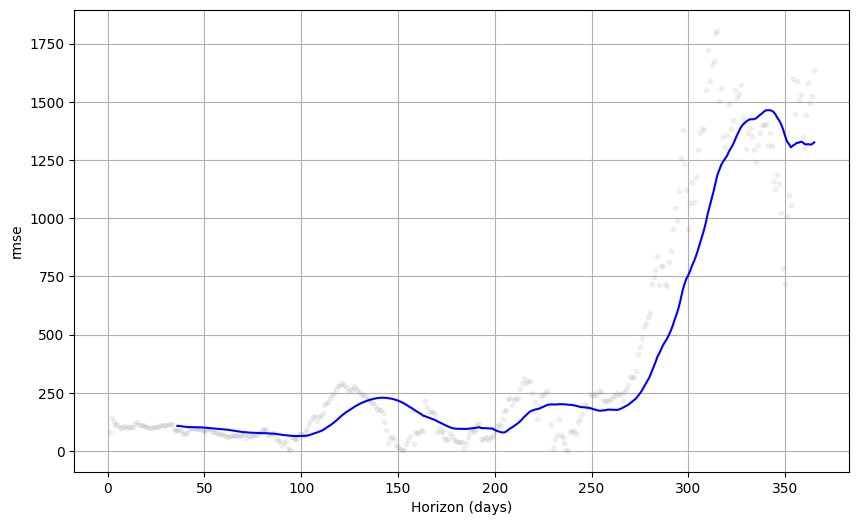

In [92]:
fig = plot_cross_validation_metric(df_cv, metric = 'rmse')

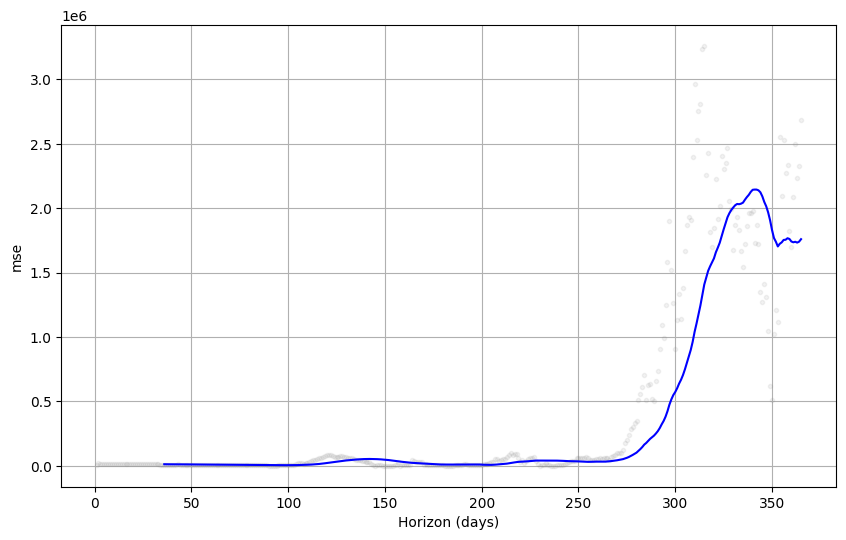

In [93]:
fig = plot_cross_validation_metric(df_cv, metric = 'mse')

From the above two plots of rmse and mse, we can infer that the forecast is off considerably after about 300 days horizon.

### --- END ---